# TensorFlow Basics

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

1.12.0


#### Tensor

In [3]:
hello = tf.constant("Hello")

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [5]:
world = tf.constant("World")

In [6]:
result = hello + world

In [7]:
result

<tf.Tensor 'add:0' shape=() dtype=string>

- To get output

In [8]:
with tf.Session() as sess:
    result = sess.run(hello+world)

In [9]:
result

b'HelloWorld'

In [10]:
tensor_1 = tf.constant(1)
tensor_2 = tf.constant(2)

In [11]:
tensor_1 + tensor_2

<tf.Tensor 'add_2:0' shape=() dtype=int32>

In [12]:
sess

In [13]:
sess.close()

### Operations

In [15]:
const = tf.constant(10)

In [16]:
fill_mat = tf.fill((4, 4), 10)

In [17]:
myzeros = tf.zeros((4, 4))

In [18]:
myones = tf.ones((4, 4))

In [19]:
myrandn = tf.random_normal((4, 4), mean=0, stddev=0.5)

In [20]:
myrandu = tf.random_uniform((4, 4), minval=0, maxval=1)

In [21]:
my_ops = [const, fill_mat, myzeros, myones, myrandn, myrandu]

#### Interactive Session

In [22]:
# Only run this cell Once
sess = tf.InteractiveSession()

In [24]:
for op in my_ops:
    print(op.eval())
    print('\n')

10


[[10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]
 [10 10 10 10]]


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


[[ 0.3290038  -0.2547377   0.6478351   0.30951738]
 [ 0.01467125 -0.53081816  0.36072984 -0.47606736]
 [-0.03891814  0.0498348   0.47633982 -0.04794336]
 [ 0.24077031  0.1774988   0.6864947  -0.3522334 ]]


[[0.5955088  0.15214539 0.733897   0.03167033]
 [0.3352015  0.34595668 0.36893427 0.9852396 ]
 [0.0331887  0.42779624 0.48207307 0.28331184]
 [0.98125184 0.53219223 0.04955411 0.70410776]]




#### Matrix Multiplication

In [25]:
a = tf.constant([[1, 2],
                  [3, 4]])

In [26]:
a.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [28]:
b = tf.constant([[10], [100]])

In [29]:
b.get_shape()

TensorShape([Dimension(2), Dimension(1)])

In [30]:
result = tf.matmul(a, b)

In [31]:
result.eval()

array([[210],
       [430]], dtype=int32)

# TensorFlow Graphs

In [32]:
import tensorflow as tf

In [33]:
n1 = tf.constant(1)
n2 = tf.constant(2)

In [34]:
n3 = n1 + n2

In [35]:
with tf.Session() as sess:
    result = sess.run(n3)
    
print(result)

3


In [37]:
print(tf.get_default_graph())

In [38]:
g = tf.Graph()

In [39]:
print(g)

In [40]:
graph_one = tf.get_default_graph()
graph_two = tf.Graph()

In [41]:
graph_one is tf.get_default_graph()

True

In [42]:
graph_two is tf.get_default_graph()

False

In [43]:
with graph_two.as_default():
    print(graph_two is tf.get_default_graph())

True


In [44]:
graph_two is tf.get_default_graph()

False

In [48]:
sess.close()

# Variables And Placeholders

In [45]:
import tensorflow as tf

In [50]:
my_tensor = tf.random_uniform((4,4),0,1)

In [51]:
my_var = tf.Variable(initial_value=my_tensor)

In [52]:
print(my_var)

<tf.Variable 'Variable:0' shape=(4, 4) dtype=float32_ref>


- You must initialize all global variables!

In [53]:
init = tf.global_variables_initializer()

In [54]:
init.run()

In [55]:
my_var.eval()

array([[0.83969784, 0.40874016, 0.9775466 , 0.9060148 ],
       [0.85211575, 0.10914791, 0.90039825, 0.19451356],
       [0.6825963 , 0.15515828, 0.03635514, 0.05786359],
       [0.99777246, 0.03972054, 0.7275077 , 0.13164318]], dtype=float32)

In [56]:
sess.run(my_var)

array([[0.83969784, 0.40874016, 0.9775466 , 0.9060148 ],
       [0.85211575, 0.10914791, 0.90039825, 0.19451356],
       [0.6825963 , 0.15515828, 0.03635514, 0.05786359],
       [0.99777246, 0.03972054, 0.7275077 , 0.13164318]], dtype=float32)

In [57]:
ph = tf.placeholder(tf.float64)

In [58]:
ph = tf.placeholder(tf.int32)

In [59]:
ph = tf.placeholder(tf.float32, shape=(None, 5))

# First Neurons

In [60]:
import numpy as np
import tensorflow as tf

In [61]:
np.random.seed(101)
tf.set_random_seed(101)

In [62]:
rand_a = np.random.uniform(0, 100, (5, 5)); rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [63]:
rand_b = np.random.uniform(0, 100, (5, 1)); rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [64]:
np.random.seed(101)
rand_a = np.random.uniform(0, 100, (5, 5))
rand_b = np.random.uniform(0, 100, (5, 1))

- Placeholders

In [65]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [66]:
add_op = a + b
mult_op = a * b

In [67]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    
    print('\n')
    
    mult_result = sess.run(mult_op, feed_dict={a:rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]


[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


In [68]:
n_features = 100
n_dense_neurons = 3

In [69]:
X = tf.placeholder(tf.float32, (None, n_features))

In [71]:
b = tf.Variable(tf.zeros([n_dense_neurons]))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

In [74]:
XW = tf.matmul(X, W)

In [75]:
z = tf.add(XW, b)

In [76]:
a = tf.sigmoid(z)

In [77]:
init = tf.global_variables_initializer()

In [79]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={X: np.random.random([1, n_features])})

In [80]:
layer_out

array([[9.1035497e-01, 9.9940693e-01, 1.0861525e-04]], dtype=float32)

## Full Network Examples

- y = mx + b

y will be the y_labels and x is the x_data

- Aritificial Data(Some Made Up Regression Data)

In [87]:
import matplotlib.pyplot as plt

In [81]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [82]:
x_data

array([-0.41317993,  0.68061715,  1.30797702,  4.79527158,  3.01436092,
        5.69979689,  6.84939035,  6.50204184, 10.06570192,  8.83186873])

In [84]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

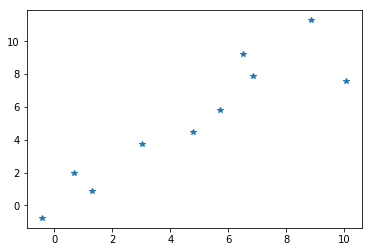

In [89]:
plt.plot(x_data, y_label, '*')

In [90]:
np.random.rand(2)

array([0.51716061, 0.94538209])

In [91]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

- **Cost Function**

In [92]:
error = 0

for x,y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y-y_hat) ** 2

- **Optimizer**

In [93]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

- **Initialize Variable**

In [95]:
init = tf.global_variables_initializer()

- **Create Session and Run!**

In [96]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    
    for i in range(epochs):
        sess.run(train)
    
    final_slope, final_intercept = sess.run([m, b])

In [97]:
final_slope

1.0187006

In [98]:
final_intercept

0.36465523

- **Evaluate Results**

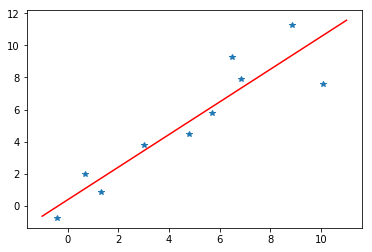

In [99]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_data, y_label, '*')
plt.plot(x_test, y_pred_plot, 'r')

# **TensorFlow Regression Example**

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [102]:
noise = np.random.randn(len(x_data))

In [103]:
b = 5

In [104]:
y_true = (0.5 * x_data) + 5 + noise

In [105]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [106]:
my_data.head()

,X Data,Y
0,0.00000,3.321716
1,0.00001,5.333978
2,0.00002,4.467539
3,0.00003,7.117742
4,0.00004,5.197544


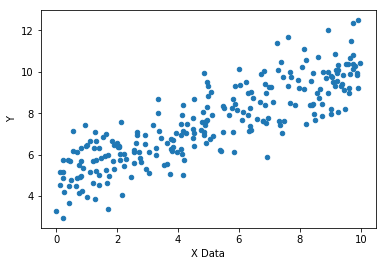

In [107]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')

- TensorFlow

Batch Size
We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [108]:
import tensorflow as tf

In [109]:
batch_size = 8
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [110]:
x = tf.placeholder(tf.float32, [batch_size])
y = tf.placeholder(tf.float32, [batch_size])

In [111]:
y_model = m*x + b

In [112]:
error = tf.reduce_sum(tf.square(y - y_model))

- **Optimizer**

In [113]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [114]:
init = tf.global_variables_initializer()

In [116]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {x: x_data[rand_ind], y: y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
    model_m, model_b = sess.run([m, b])

In [117]:
model_m

0.5314865

In [118]:
model_b

4.9166737

In [119]:
y_hat = x_data * model_m + model_b

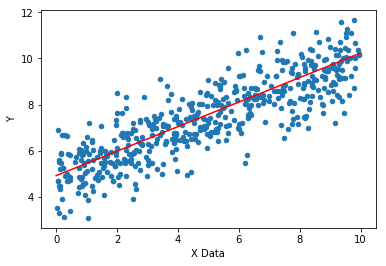

In [121]:
my_data.sample(500).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

- **tf.estimator API**

In [125]:
feat_cols = [tf.feature_column.numeric_column('X', shape=[1])]

In [126]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/x8/j_0xhw69403c9bk6031w0gmnn2583p/T/tmpbh79zfoe', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x14a46df98>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [127]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700000,), (700000,), (300000,), (300000,))

In [136]:
input_func = tf.estimator.inputs.numpy_input_fn({'X': X_train}, y_train, batch_size=4, num_epochs=None, shuffle=True)

In [137]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'X':X_train},y_train,batch_size=4,num_epochs=1000,shuffle=False)

In [138]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'X':X_test},y_test,batch_size=4,num_epochs=1000,shuffle=False)

In [140]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/x8/j_0xhw69403c9bk6031w0gmnn2583p/T/tmpbh79zfoe/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/x8/j_0xhw69403c9bk6031w0gmnn2583p/T/tmpbh79zfoe/model.ckpt.
INFO:tensorflow:loss = 238.1156, step = 2
INFO:tensorflow:global_step/sec: 587.866
INFO:tensorflow:loss = 5.0871744, step = 102 (0.172 sec)
INFO:tensorflow:global_step/sec: 937.612
INFO:tensorflow:loss = 3.426995, step = 202 (0.106 sec)
INFO:tensorflow:global_step/sec: 880.522
INFO:tensorflow:loss = 27.674828, step = 302 (0.114 sec)
INFO:tensorflow:global_step/sec: 935.717
INFO:tensorflow:loss = 2.9314277, step = 402 (0.107 sec)
INFO:tensorflow:global_step/sec: 834.78
INFO:tensorflow:loss = 8.22006, step = 502 (0.119 sec)


In [141]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-10-07:24:06
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/x8/j_0xhw69403c9bk6031w0gmnn2583p/T/tmpbh79zfoe/model.ckpt-1001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-10-07:24:07
INFO:tensorflow:Saving dict for global step 1001: average_loss = 1.0972426, global_step = 1001, label/mean = 7.4649873, loss = 4.3889704, prediction/mean = 7.3909545
INFO:tensorflow:Saving 

In [142]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-10-07:24:36
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/x8/j_0xhw69403c9bk6031w0gmnn2583p/T/tmpbh79zfoe/model.ckpt-1001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-02-10-07:24:38
INFO:tensorflow:Saving dict for global step 1001: average_loss = 1.1229401, global_step = 1001, label/mean = 7.4727306, loss = 4.4917603, prediction/mean = 7.374589
INFO:tensorflow:Saving '

In [143]:
print("train metrics: {}".format(train_metrics))
print("eval metrics: {}".format(eval_metrics))

train metrics: {'average_loss': 1.0972426, 'label/mean': 7.4649873, 'loss': 4.3889704, 'prediction/mean': 7.3909545, 'global_step': 1001}
eval metrics: {'average_loss': 1.1229401, 'label/mean': 7.4727306, 'loss': 4.4917603, 'prediction/mean': 7.374589, 'global_step': 1001}


In [144]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'X':np.linspace(0,10,10)},shuffle=False)

In [145]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/x8/j_0xhw69403c9bk6031w0gmnn2583p/T/tmpbh79zfoe/model.ckpt-1001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.3670435], dtype=float32)},
 {'predictions': array([5.03897], dtype=float32)},
 {'predictions': array([5.710896], dtype=float32)},
 {'predictions': array([6.382822], dtype=float32)},
 {'predictions': array([7.0547485], dtype=float32)},
 {'predictions': array([7.726674], dtype=float32)},
 {'predictions': array([8.398601], dtype=float32)},
 {'predictions': array([9.070527], dtype=float32)},
 {'predictions': array([9.742454], dtype=float32)},
 {'predictions': array([10.414379], dtype=float32)}]

In [146]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/x8/j_0xhw69403c9bk6031w0gmnn2583p/T/tmpbh79zfoe/model.ckpt-1001
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
